# Problem Set 7

In [2]:
import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import pandas as pd
import qeds
import numpy as np

## Question 1

From [Data Visualization: Rules and Guidelines](../applications/visualization_rules.ipynb)

Create a bar chart of the below data on Canadian GDP growth.
Use a non-red color for the years 2000 to 2008, red for
2009, and the first color again for 2010 to 2018.

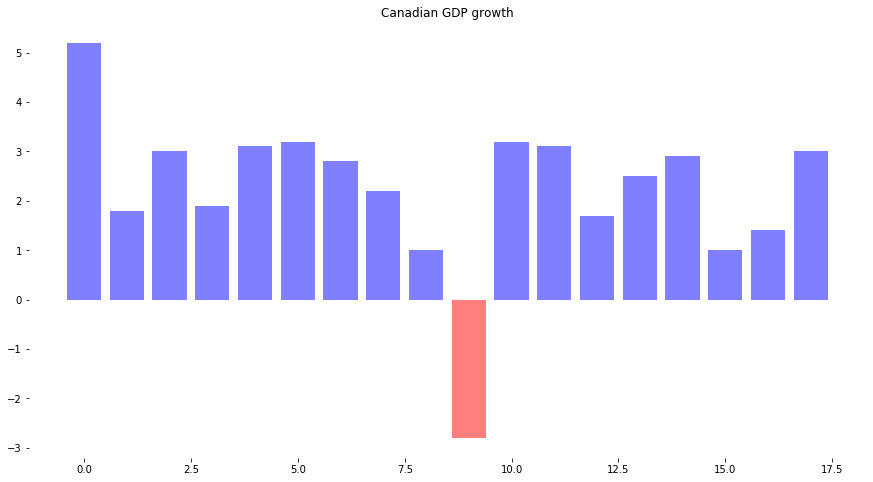

In [3]:
ca_gdp = pd.Series(
    [5.2, 1.8, 3.0, 1.9, 3.1, 3.2, 2.8, 2.2, 1.0, -2.8, 3.2, 3.1, 1.7, 2.5, 2.9, 1.0, 1.4, 3.0],
    index=list(range(2000, 2018))
)

fig, ax = plt.subplots(figsize=(15,8))
#set the list of colors that gonna be used
colors = ["r" if x == ca_gdp.loc[2009] else "b" for x in ca_gdp.values]

#sequence of the colors , height of the bar by extracting values
bars = ax.bar(np.arange(len(colors)), ca_gdp.values, color=colors, alpha=0.5)
ax.set_title("Canadian GDP growth")


for side in ["right", "top", "left", "bottom"]:
    ax.spines[side].set_visible(False)




## Question 2

From [Data Visualization: Rules and Guidelines](../applications/visualization_rules.ipynb)

Draft another way to organize time and education by modifying the code below.
That is, have two subplots (one for each
education level) and four groups of points (one for each year).

Why do you think they chose to organize the information the way they
did rather than this way?

In [1]:
# Read in data
df = pd.read_csv("https://datascience.quantecon.org/assets/data/density_wage_data.csv")
df["year"] = df.year.astype(int)  # Convert year to int


def single_scatter_plot(df, year, educ, ax, color):
    """
    This function creates a single year's and education level's
    log density to log wage plot
    """
    # Filter data to keep only the data of interest
    _df = df.query("(year == @year) & (group == @educ)")
    _df.plot(
        kind="scatter", x="density_log", y="wages_logs", ax=ax, color=color
    )

    return ax



# Create initial plot
fig, ax = plt.subplots(1, 4, figsize=(16, 6))
colors = {"college": "#1385ff", "noncollege": "#ff6d13"}

for (i, year) in enumerate(df.year.unique()):
    single_scatter_plot(df, year, "college", ax[i], colors["college"])
    single_scatter_plot(df, year, "noncollege", ax[i], colors["noncollege"])
    ax[i].set_title(str(year))

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
for (i, _ax) in enumerate(ax):
    # Label with words
    if i == 0:
        _ax.set_xlabel("Population Density")
    else:
        _ax.set_xlabel("")

    # Turn off right and top axis lines
    _ax.spines['right'].set_visible(False)
    _ax.spines['top'].set_visible(False)

    # Don't use such a white background color
    _ax.set_facecolor(bgcolor)

    # Change bounds
    _ax.set_ylim((np.log(4), np.log(30)))
    _ax.set_xlim((0, 10))

    # Change ticks
    xticks = [10, 100, 1000, 10000]
    _ax.set_xticks([np.log(xi) for xi in xticks])
    _ax.set_xticklabels([str(xi) for xi in xticks])

    yticks = list(range(5, 32, 5))
    _ax.set_yticks([np.log(yi) for yi in yticks])
    if i == 0:
        _ax.set_yticklabels([str(yi) for yi in yticks])
        _ax.set_ylabel("Average Wage")
    else:
        _ax.set_yticklabels([])
        _ax.set_ylabel("")

ax[0].annotate("College Educated Workers", (np.log(75), np.log(14.0)), color=colors["college"])
ax[0].annotate("Non-College Educated Workers", (np.log(10), np.log(5.25)), color=colors["noncollege"]);

NameError: name 'pd' is not defined

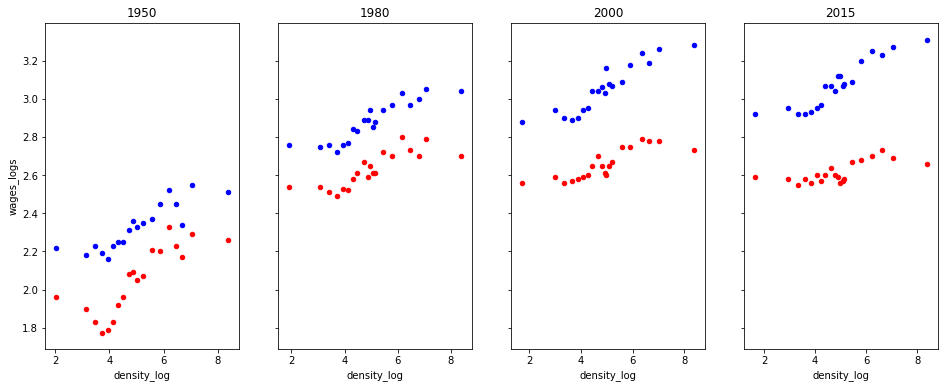

In [5]:
# Read in data
df = pd.read_csv("https://datascience.quantecon.org/assets/data/density_wage_data.csv")
df["year"] = df.year.astype(int)  # Convert year to int


def single_scatter_plot(df, year, educ, ax, color):
    """
    This function creates a single year's and education level's
    log density to log wage plot
    """
    # Filter data to keep only the data of interest
    _df = df.query("(year == @year) & (group == @educ)")
    _df.plot(
        kind="scatter", x="density_log", y="wages_logs", ax=ax, color=color
    )

    return ax

# Create initial plot
fig, ax = plt.subplots(1, 4, figsize=(16, 6), sharey=True)

for (i, year) in enumerate(df.year.unique()):
    single_scatter_plot(df, year, "college", ax[i], "b")
    single_scatter_plot(df, year, "noncollege", ax[i], "r")
    ax[i].set_title(str(year))

In [6]:
#Just look at the difference, the fine-tuning process created much difference 
# On this graph wage_logs and density_log doesn't start from 0 on the vertical axis 
# those two indicators cannot offer the public a directly useful information. we should
# rescale the log function by exp; However, this step would make both axis messy.
# Therefore, we give integers on both axis, in particular, larger scale on x axis, since larger after log  
# 10, 100, .... represents the exponential growth.


# minor details:
#1. deinsity_log" is the common x axis in 4 graphs, so it would be better to pool it together 
#   on the first graph,  name it as population density, wage rate are more understandable 
#2. The background color is slightly darker, the graph doesn't include top and right spines which made
#   it more visual-friendly for a horizontal sequence of subplots 
#3. Warmer colors, better labels 

## Questions 3-5

These question uses a dataset from the [Bureau of Transportation
Statistics]([https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time](https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time))
that describes the cause for all US domestic flight delays
in November 2016. We used the same data in the previous problem set.

In [7]:
air_perf = qeds.load("airline_performance_dec16")[["CRSDepTime", "Carrier", "CarrierDelay", "ArrDelay"]]
air_perf.info()
air_perf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460949 entries, 0 to 460948
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   CRSDepTime    460949 non-null  datetime64[ns]
 1   Carrier       460949 non-null  object        
 2   CarrierDelay  460949 non-null  float64       
 3   ArrDelay      452229 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 14.1+ MB


,CRSDepTime,Carrier,CarrierDelay,ArrDelay
0,2016-12-18 15:58:00,AA,0.0,20.0
1,2016-12-19 15:58:00,AA,0.0,20.0
2,2016-12-20 15:58:00,AA,0.0,-3.0
3,2016-12-21 15:58:00,AA,0.0,-10.0
4,2016-12-22 15:58:00,AA,0.0,-8.0


The following questions are intentionally somewhat open-ended. For
each one, carefully choose the type of visualization you’ll create.
Put some effort into choosing colors, labels, and other
formatting.

### Question 3

Create a visualization of the relationship between airline (carrier)
and delays.

In [9]:
#frequency day
delays_mean_sum = (
    air_perf
    .groupby([pd.Grouper(key="CRSDepTime",freq="W"), "Carrier"])
    ["CarrierDelay"]               # extract one column
    .mean().unstack(level="Carrier")                   # take average
      # Flip carrier up as column names
).sum()
delays_mean_sum



Carrier
AA    19.428696
AS    14.127083
B6    26.657303
DL    22.028873
EV    34.692192
F9    36.207592
HA    21.836435
NK    20.719276
OO    31.721850
UA    21.310210
VX    15.618891
WN    14.986287
dtype: float64

Text(18, -2, 'The mean cutoff')

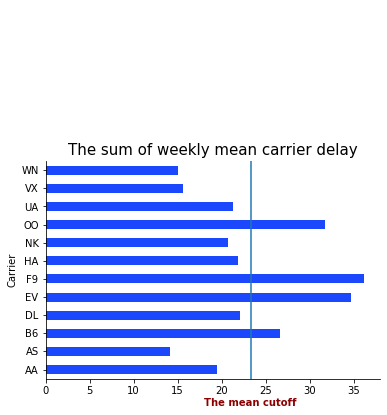

In [10]:
fig, ax = plt.subplots()

delays_mean_sum.plot(kind="barh", ax=ax, color="#1b48fc")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("The sum of weekly mean carrier delay",size =15)
plt.axvline(x=delays_mean_sum.mean())
ax.annotate(
    "The mean cutoff",
    xy=(10, 20), xycoords="data", xytext=(18, -2),
    annotation_clip=False,
    horizontalalignment="left",
    arrowprops={"visible": False},
    fontsize=12, fontweight="semibold", color = tuple(np.array([139,0,0]) / 255),size =10)



Carrier
AA     24.477855
AS     26.366433
B6     53.757561
DL     16.551397
EV     59.410668
F9    109.064795
HA     22.930672
NK     55.845054
OO     73.056735
UA     37.451063
VX     62.246742
WN     33.986343
dtype: float64

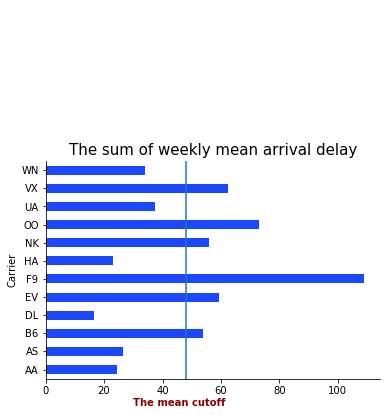

In [15]:
arrdelays_mean_sum = (
    air_perf
    .groupby([pd.Grouper(key="CRSDepTime",freq="W"), "Carrier"])
    ["ArrDelay"]               # extract one column
    .mean().unstack(level="Carrier")                   # take average
      # Flip carrier up as column names
).sum()
arrdelays_mean_sum

fig, ax = plt.subplots()

arrdelays_mean_sum.plot(kind="barh", ax=ax, color="#1b48fc")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("The sum of weekly mean arrival delay",size =15)
plt.axvline(x=arrdelays_mean_sum.mean())
ax.annotate(
    "The mean cutoff",
    xy=(10, 20), xycoords="data", xytext=(30, -2),
    annotation_clip=False,
    horizontalalignment="left",
    arrowprops={"visible": False},
    fontsize=12, fontweight="semibold", color = tuple(np.array([139,0,0]) / 255),size =10)

arrdelays_mean_sum


In [20]:
weekly_delays_mean_week_1 = (
    air_perf
    .groupby([pd.Grouper(key="CRSDepTime", freq="W"), "Carrier"])
    ["CarrierDelay"]               
    .mean().unstack("CRSDepTime"))
weekly_delays_mean_week_1

CRSDepTime,2016-12-04,2016-12-11,2016-12-18,2016-12-25,2017-01-01
Carrier,,,,,
AA,2.354429,2.922803,6.258553,4.451547,3.441364
AS,3.488385,3.409608,2.691032,2.083979,2.454080
B6,2.774204,4.028362,9.031615,5.260043,5.563079
DL,2.460968,3.417515,8.864212,3.202353,4.083825
EV,5.740243,7.569671,9.939504,5.923095,5.519679
F9,2.329341,2.499455,10.430704,16.787223,4.160870
HA,1.792176,3.806338,5.034266,5.493065,5.710590
NK,4.259962,2.757091,5.294646,5.167658,3.239919
OO,3.325958,6.188295,10.439691,6.037547,5.730359


In [21]:
carrier_code = qeds.load("airline_carrier_codes").reset_index().rename(columns={'Code': 'Carrier'})
weekly_delays_mean_name= pd.merge( carrier_code,weekly_delays_mean_week_1, on="Carrier") 


weekly_delays_mean_name.drop([5,12],inplace=True)
weekly_delays_mean_name_2 = weekly_delays_mean_name.reset_index()
weekly_delays_mean_name_3 = weekly_delays_mean_name_2.drop(["index","Carrier"],axis=1)


weekly_delays_mean_name_4 = weekly_delays_mean_name_3.set_index('Description')
weekly_delays_mean_name_5 = weekly_delays_mean_name_4.T
 
weekly_delays_mean_name_5


Description,American Airlines Inc. (1960 - ),Alaska Airlines Inc. (1960 - ),JetBlue Airways (2000 - ),Delta Air Lines Inc. (1960 - ),ExpressJet Airlines Inc. (2012 - ),Frontier Airlines Inc. (1994 - ),Hawaiian Airlines Inc. (1960 - ),Spirit Air Lines (1992 - ),SkyWest Airlines Inc. (2003 - ),United Air Lines Inc. (1960 - ),Virgin America (2007 - ),Southwest Airlines Co. (1979 - )
2016-12-04 00:00:00,2.354429,3.488385,2.774204,2.460968,5.740243,2.329341,1.792176,4.259962,3.325958,3.634622,1.470667,1.421003
2016-12-11 00:00:00,2.922803,3.409608,4.028362,3.417515,7.569671,2.499455,3.806338,2.757091,6.188295,3.574625,2.691968,1.957857
2016-12-18 00:00:00,6.258553,2.691032,9.031615,8.864212,9.939504,10.430704,5.034266,5.294646,10.439691,6.312636,5.608362,4.873790
2016-12-25 00:00:00,4.451547,2.083979,5.260043,3.202353,5.923095,16.787223,5.493065,5.167658,6.037547,4.687198,3.560741,3.845179
2017-01-01 00:00:00,3.441364,2.454080,5.563079,4.083825,5.519679,4.160870,5.710590,3.239919,5.730359,3.101129,2.287154,2.888458


In [27]:
weekly_delays_mean_week =  (
    air_perf
    .groupby([pd.Grouper(key="CRSDepTime", freq="W"), "Carrier"])
    ["CarrierDelay"]               
    .mean().unstack("Carrier"))
weekly_delays_mean_week_1
weekly_delays_mean_week.columns = list(weekly_delays_mean_name_5)
weekly_delays_mean_week

,American Airlines Inc. (1960 - ),Alaska Airlines Inc. (1960 - ),JetBlue Airways (2000 - ),Delta Air Lines Inc. (1960 - ),ExpressJet Airlines Inc. (2012 - ),Frontier Airlines Inc. (1994 - ),Hawaiian Airlines Inc. (1960 - ),Spirit Air Lines (1992 - ),SkyWest Airlines Inc. (2003 - ),United Air Lines Inc. (1960 - ),Virgin America (2007 - ),Southwest Airlines Co. (1979 - )
CRSDepTime,,,,,,,,,,,,
2016-12-04,2.354429,3.488385,2.774204,2.460968,5.740243,2.329341,1.792176,4.259962,3.325958,3.634622,1.470667,1.421003
2016-12-11,2.922803,3.409608,4.028362,3.417515,7.569671,2.499455,3.806338,2.757091,6.188295,3.574625,2.691968,1.957857
2016-12-18,6.258553,2.691032,9.031615,8.864212,9.939504,10.430704,5.034266,5.294646,10.439691,6.312636,5.608362,4.873790
2016-12-25,4.451547,2.083979,5.260043,3.202353,5.923095,16.787223,5.493065,5.167658,6.037547,4.687198,3.560741,3.845179
2017-01-01,3.441364,2.454080,5.563079,4.083825,5.519679,4.160870,5.710590,3.239919,5.730359,3.101129,2.287154,2.888458


In [30]:
weekly_delays_arrivial_mean = (
    air_perf
    .groupby([pd.Grouper(key="CRSDepTime", freq="W"), "Carrier"])
    ["ArrDelay"]               
    .mean().unstack("Carrier"))
weekly_delays_arrivial_mean.columns =  list(weekly_delays_mean_name_5)
weekly_delays_arrivial_mean

,American Airlines Inc. (1960 - ),Alaska Airlines Inc. (1960 - ),JetBlue Airways (2000 - ),Delta Air Lines Inc. (1960 - ),ExpressJet Airlines Inc. (2012 - ),Frontier Airlines Inc. (1994 - ),Hawaiian Airlines Inc. (1960 - ),Spirit Air Lines (1992 - ),SkyWest Airlines Inc. (2003 - ),United Air Lines Inc. (1960 - ),Virgin America (2007 - ),Southwest Airlines Co. (1979 - )
CRSDepTime,,,,,,,,,,,,
2016-12-04,-1.714887,2.724273,-2.894269,-5.088351,8.655332,-2.894212,-0.558282,5.468909,2.749573,5.564496,-2.121821,-1.663695
2016-12-11,1.148833,12.052031,5.795062,2.507745,13.220673,4.578861,2.054302,8.713755,15.429660,4.094176,12.080938,1.865933
2016-12-18,16.357561,7.643767,34.608356,18.000000,23.876622,45.014888,9.388889,22.857899,30.901639,22.398130,33.651128,18.373400
2016-12-25,6.364513,2.719699,5.586836,-0.916113,6.857143,54.084959,5.075747,10.443369,15.004780,5.332474,17.286917,10.197685
2017-01-01,2.321836,1.226662,10.661577,2.048116,6.800898,8.280298,6.970016,8.361123,8.971083,0.061786,1.349580,5.213019


Text(3.2, 12, 'by week')

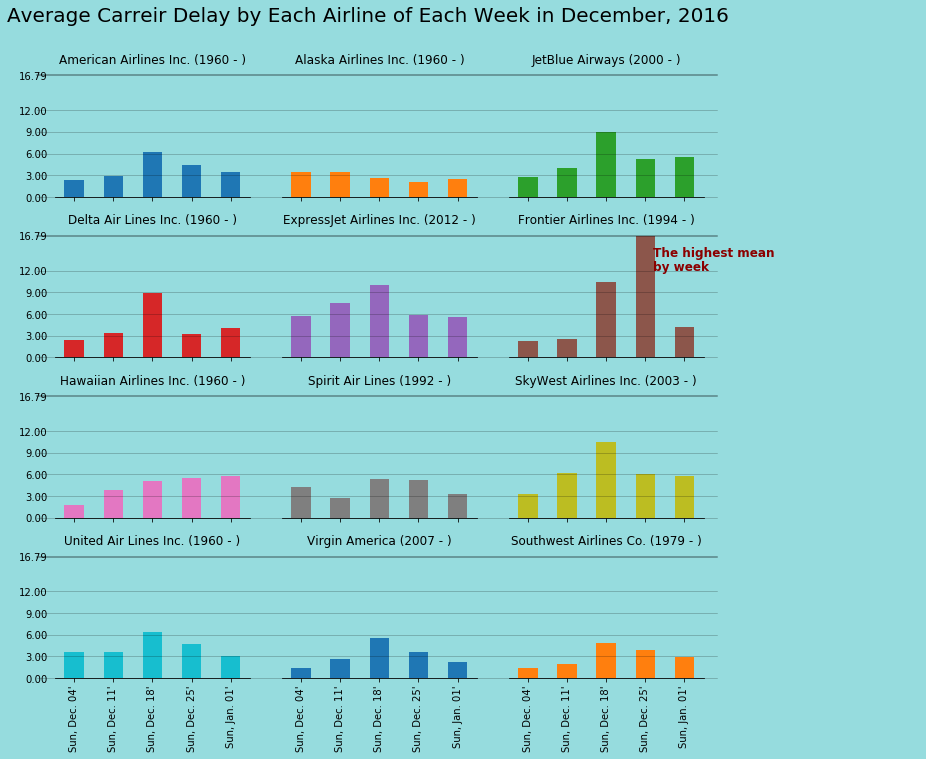

In [33]:
import matplotlib.transforms as transforms
background_1 = tuple(np.array([253, 238, 222]) / 255)
background_2 = tuple(np.array([150, 220, 222]) / 255)
background_3 = tuple(np.array([200, 255, 194])/ 255)
background_4 = tuple(np.array([255, 229, 249]) / 255)

yticks = [0, 3, 6, 9, 12, weekly_delays_mean_week.max().max()]

fig, axs = plt.subplots(4, 3, sharey=True, sharex = True, figsize=(10, 10))
weekly_delays_mean_week.plot.bar(
    ax=axs, subplots=True, yticks=yticks, legend=False, grid = False

   
);


for ax in axs[-1, :]:
    ax.set_xticklabels(weekly_delays_mean_week.index.strftime("%a, %b. %d'"))
    ax.set_xlabel("")
    ax.tick_params(which="both", left=False)
for direction in ["left",  "right", "top"]:
    for ax in axs[0,:]:
        ax.spines[direction].set_visible(False)
        ax.tick_params(which="both", left=False, labelbottom=False)
        ax.set_facecolor(background_2)
        
        
    for ax in axs[1,:]:
        ax.spines[direction].set_visible(False)
        ax.tick_params(which="both", left=False, labelbottom=False)
        ax.set_facecolor(background_2)
        
    for ax in axs[2,:]:
        ax.spines[direction].set_visible(False)
        ax.tick_params(which="both", left=False, labelbottom=False)
        ax.set_facecolor(background_2)
    for ax in axs[3,:]:
        ax.spines[direction].set_visible(False)
        ax.tick_params(which="both", left=False)
        ax.set_facecolor(background_2)
fig.suptitle("Average Carreir Delay by Each Airline of Each Week in December, 2016", y=1.05 , size =20)
fig.set_facecolor(background_2)
fig.tight_layout()

trans_1 = transforms.blended_transform_factory(
    fig.transFigure,  # goes across whole figure in x direction
    axs[0,0].transData  # goes up with the y data in the first axis
)
trans_2 = transforms.blended_transform_factory(
    fig.transFigure,  # goes across whole figure in x direction
    axs[1,0].transData  # goes up with the y data in the first axis
)
trans_3 = transforms.blended_transform_factory(
    fig.transFigure,  # goes across whole figure in x direction
    axs[2,0].transData  # goes up with the y data in the first axis
)
trans_4 = transforms.blended_transform_factory(
    fig.transFigure,  # goes across whole figure in x direction
    axs[3,0].transData  # goes up with the y data in the first axis
)
   


for y in yticks:
    l = plt.Line2D(
        # x values found by trial and error
        [0.04, 0.985], [y, y],
        transform=trans_1,
        color="black", alpha=0.4, linewidth=0.5,
        zorder=0.1
    )

    if y == weekly_delays_mean_week.max().max():
        l.set_linewidth(1.5)

    fig.lines.append(l)

for y in yticks:
    l = plt.Line2D(
        # x values found by trial and error
        [0.04, 0.985], [y, y],
        transform=trans_2,
        color="black", alpha=0.4, linewidth=0.5,
        zorder=0.1
    )

    if y == weekly_delays_mean_week.max().max():
        l.set_linewidth(1.5)

    fig.lines.append(l)

for y in yticks:
    l = plt.Line2D(
        # x values found by trial and error
        [0.04, 0.985], [y, y],
        transform=trans_3,
        color="black", alpha=0.4, linewidth=0.5,
        zorder=0.1
    )

    if y == weekly_delays_mean_week.max().max():
        l.set_linewidth(1.5)

    fig.lines.append(l)

for y in yticks:
    l = plt.Line2D(
        # x values found by trial and error
        [0.04, 0.985], [y, y],
        transform=trans_4,
        color="black", alpha=0.4, linewidth=0.5,
        zorder=0.1
    )

    if y == weekly_delays_mean_week.max().max():
        l.set_linewidth(1.5)

    fig.lines.append(l)
    
axs[1,2].annotate(
    "The highest mean",
    xy=(10, 20), xycoords="data", xytext=(3.2, 14),
    annotation_clip=False,
    horizontalalignment="left",
    arrowprops={"visible": False},
    fontsize=12, fontweight="semibold", color = tuple(np.array([139,0,0]) / 255)
    
)
axs[1,2].annotate(
    "by week",
    xy=(10, 20), xycoords="data", xytext=(3.2, 12),
    annotation_clip=False,
    horizontalalignment="left",
    arrowprops={"visible": False},
    fontsize=12, fontweight="semibold", color = tuple(np.array([139,0,0]) / 255)
    
)








Text(3.2, 32, 'by week')

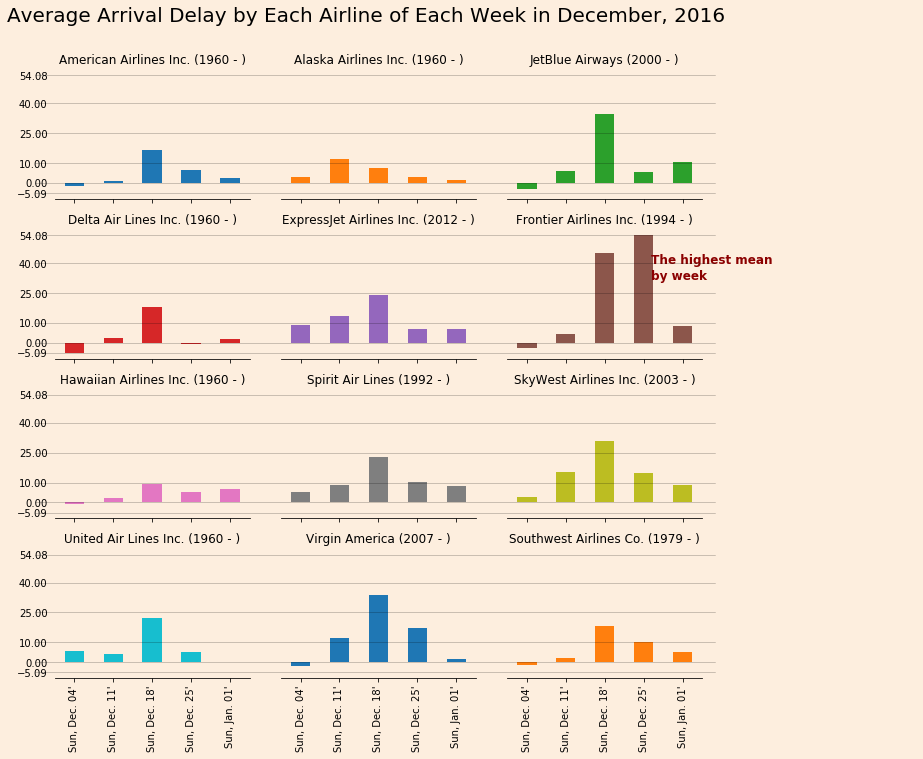

In [32]:
import matplotlib.transforms as transforms
background_1 = tuple(np.array([253, 238, 222]) / 255)
background_2 = tuple(np.array([150, 220, 222]) / 255)
background_3 = tuple(np.array([200, 255, 194])/ 255)
background_4 = tuple(np.array([255, 229, 249]) / 255)


yticks = [weekly_delays_arrivial_mean.min().min(), 0,10,25,40, weekly_delays_arrivial_mean.max().max()]
fig, axs = plt.subplots(4, 3, sharey=True, sharex = True, figsize=(10, 10))
weekly_delays_arrivial_mean.plot.bar(
    ax=axs, subplots=True, yticks=yticks, legend=False, grid = False

   
);


for ax in axs[-1, :]:
    ax.set_xticklabels(weekly_delays_arrivial_mean.index.strftime("%a, %b. %d'"))
    ax.set_xlabel("")
    ax.tick_params(which="both", left=False)
for direction in ["left",  "right", "top"]:
    for ax in axs[0,:]:
        ax.spines[direction].set_visible(False)
        ax.tick_params(which="both", left=False, labelbottom=False)
        ax.set_facecolor(background_1)
        
        
    for ax in axs[1,:]:
        ax.spines[direction].set_visible(False)
        ax.tick_params(which="both", left=False, labelbottom=False)
        ax.set_facecolor(background_1)
        
    for ax in axs[2,:]:
        ax.spines[direction].set_visible(False)
        ax.tick_params(which="both", left=False, labelbottom=False)
        ax.set_facecolor(background_1)
    for ax in axs[3,:]:
        ax.spines[direction].set_visible(False)
        ax.tick_params(which="both", left=False)
        ax.set_facecolor(background_1)
fig.suptitle("Average Arrival Delay by Each Airline of Each Week in December, 2016", y=1.05 , size =20)
fig.set_facecolor(background_1)
fig.tight_layout()

trans_1 = transforms.blended_transform_factory(
    fig.transFigure,  # goes across whole figure in x direction
    axs[0,0].transData  # goes up with the y data in the first axis
)
trans_2 = transforms.blended_transform_factory(
    fig.transFigure,  # goes across whole figure in x direction
    axs[1,0].transData  # goes up with the y data in the first axis
)
trans_3 = transforms.blended_transform_factory(
    fig.transFigure,  # goes across whole figure in x direction
    axs[2,0].transData  # goes up with the y data in the first axis
)
trans_4 = transforms.blended_transform_factory(
    fig.transFigure,  # goes across whole figure in x direction
    axs[3,0].transData  # goes up with the y data in the first axis
)
   


for y in yticks:
    l = plt.Line2D(
        # x values found by trial and error
        [0.04, 0.985], [y, y],
        transform=trans_1,
        color="black", alpha=0.4, linewidth=0.5,
        zorder=0.1
    )

    if y == weekly_delays_mean_week.max().max():
        l.set_linewidth(1.5)

    fig.lines.append(l)

for y in yticks:
    l = plt.Line2D(
        # x values found by trial and error
        [0.04, 0.985], [y, y],
        transform=trans_2,
        color="black", alpha=0.4, linewidth=0.5,
        zorder=0.1
    )

    if y == weekly_delays_mean_week.max().max():
        l.set_linewidth(1.5)

    fig.lines.append(l)

for y in yticks:
    l = plt.Line2D(
        # x values found by trial and error
        [0.04, 0.985], [y, y],
        transform=trans_3,
        color="black", alpha=0.4, linewidth=0.5,
        zorder=0.1
    )

    if y == weekly_delays_mean_week.max().max():
        l.set_linewidth(1.5)

    fig.lines.append(l)

for y in yticks:
    l = plt.Line2D(
        # x values found by trial and error
        [0.04, 0.985], [y, y],
        transform=trans_4,
        color="black", alpha=0.4, linewidth=0.5,
        zorder=0.1
    )

    if y == weekly_delays_mean_week.max().max():
        l.set_linewidth(1.5)

    fig.lines.append(l)
    
axs[1,2].annotate(
    "The highest mean",
    xy=(10, 20), xycoords="data", xytext=(3.2, 40),
    annotation_clip=False,
    horizontalalignment="left",
    arrowprops={"visible": False},
    fontsize=12, fontweight="semibold", color = tuple(np.array([139,0,0]) / 255)
    
)
axs[1,2].annotate(
    "by week",
    xy=(10, 20), xycoords="data", xytext=(3.2, 32),
    annotation_clip=False,
    horizontalalignment="left",
    arrowprops={"visible": False},
    fontsize=12, fontweight="semibold", color = tuple(np.array([139,0,0]) / 255)
    
)









### Question 4

Create a visualization of the relationship between date and delays.

In [71]:
#I plot the delay of each carrier and the sum, and the mean of delay 

delays_mean_day_mean =  (
    air_perf
    .groupby([pd.Grouper(key="CRSDepTime", freq="D"), "Carrier"])
    ["CarrierDelay"]               
    .mean().unstack("Carrier"))
carrier_delay_mean=delays_mean_day_mean.mean(axis = 1)

arrdelays_mean_day_mean =  (
    air_perf
    .groupby([pd.Grouper(key="CRSDepTime", freq="D"), "Carrier"])
    ["ArrDelay"]               
    .mean().unstack("Carrier"))
arr_delay_mean=arrdelays_mean_day_mean.mean(axis = 1)
arr_delay_mean.idxmax()

Timestamp('2016-12-17 00:00:00', freq='D')

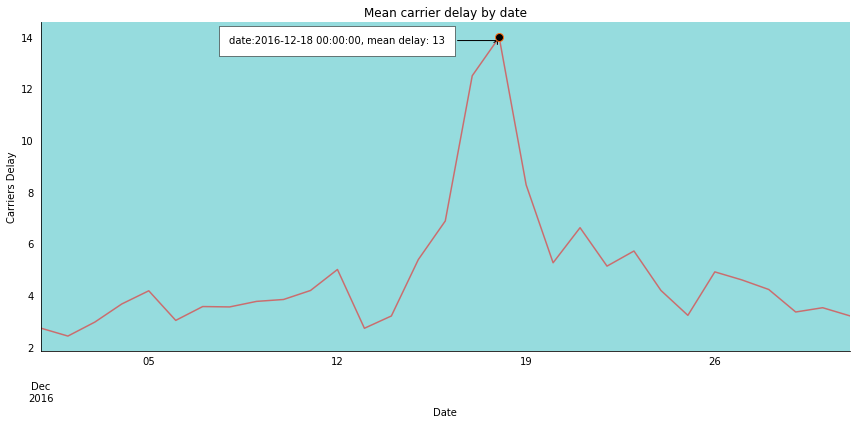

In [209]:


fig, ax = plt.subplots(figsize=(12,6))

carrier_delay_mean.plot(ax=ax, legend=False, color ='red', alpha = 0.5)


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_title("Mean carrier delay by date")
ax.set_ylabel("Time")
ax.tick_params(which="both", left=False,bottom=False)
ax.set_ylabel("Carriers Delay")
ax.set_xlabel("Date")
ax.plot(carrier_delay_mean.idxmax(), carrier_delay_mean.max(), 'o', markeredgecolor="#ff6d13", markersize=8, color="black", 
        zorder=10)

text= "date:{}, mean delay: {}".format(carrier_delay_mean.idxmax(), int(carrier_delay_mean.max()))
bbox_props = dict(boxstyle="square,pad=1.0", fc="w", ec="k", lw=0.5)
arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
kw = dict(xycoords='data',textcoords="axes fraction",
arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
ax.annotate(text, xy=(carrier_delay_mean.idxmax(), carrier_delay_mean.max()), xytext=(0.5,0.96), **kw)
ax.set_facecolor(background_2)
fig.tight_layout()





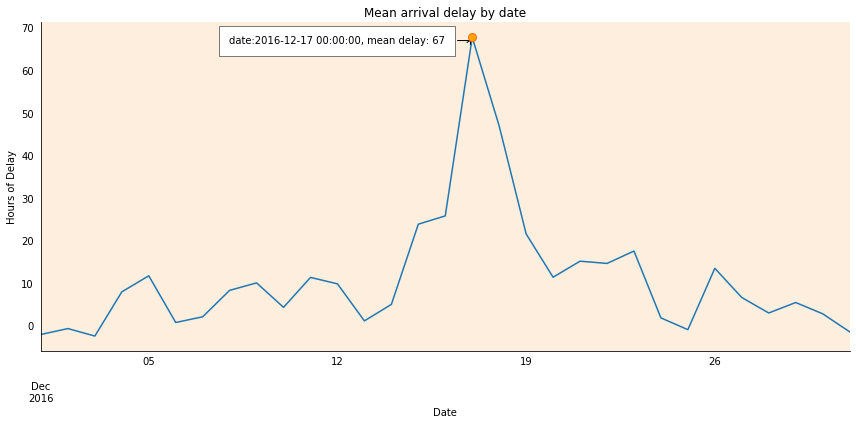

In [102]:
fig, ax = plt.subplots(figsize=(12,6))

arr_delay_mean.plot(ax=ax, legend=False)


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_title("Mean arrival delay by date")
ax.set_ylabel("Time")
ax.tick_params(which="both", left=False,bottom=False)
ax.set_ylabel("Hours of Delay")
ax.set_xlabel("Date")
ax.plot(arr_delay_mean.idxmax(), arr_delay_mean.max(), 'o', markeredgecolor="#ff6d13", markersize=8, color="orange", zorder=10)

text= "date:{}, mean delay: {}".format(arr_delay_mean.idxmax(), int(arr_delay_mean.max()))
bbox_props = dict(boxstyle="square,pad=1.0", fc="w", ec="k", lw=0.5)
arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
kw = dict(xycoords='data',textcoords="axes fraction",
arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
ax.annotate(text, xy=(arr_delay_mean.idxmax(), arr_delay_mean.max()), xytext=(0.5,0.96), **kw)
ax.set_facecolor(background_1)
fig.tight_layout()



Text(0.5, 0, 'Date')

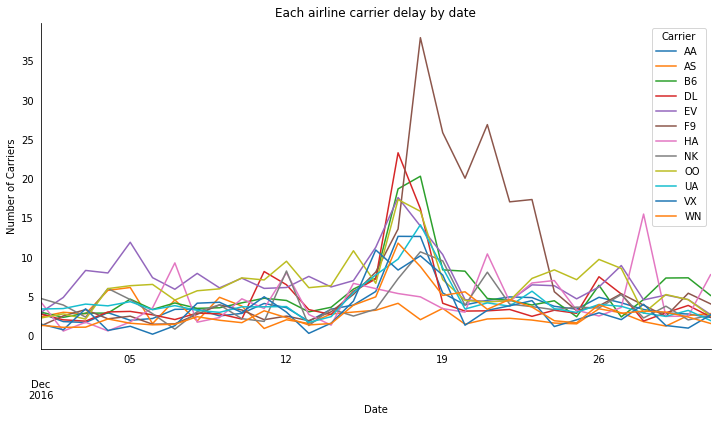

In [223]:
fig, ax = plt.subplots(figsize=(12,6))

delays_mean_day_mean.plot(ax=ax, legend=True)


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_title("Each airline carrier delay by date")
ax.set_ylabel("Time")
ax.tick_params(which="both", left=False,bottom=False)
ax.set_ylabel("Number of Carriers")
ax.set_xlabel("Date")

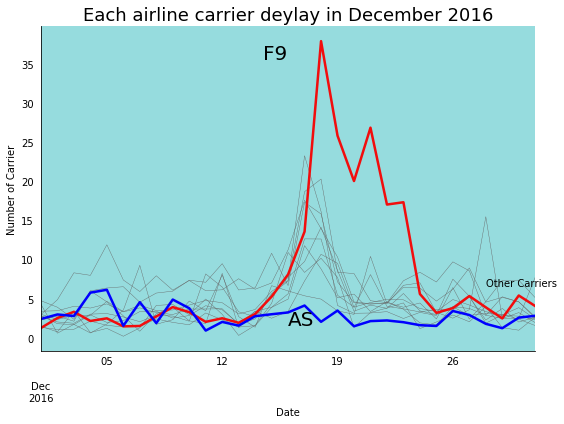

In [220]:
fig, ax = plt.subplots(figsize=(8,6))



carreir_df = list(delays_mean_day_mean.columns)

not_highest = carreir_df
not_highest.remove("F9")
not_highest.remove("AS")

delays_mean_day_mean[not_highest].plot(ax=ax, color=[(0.4, 0.4, 0.4)],lw=0.4, legend=False)
plt.text(0.9,0.2,'Other Carriers', transform=ax.transAxes,size=10)


delays_mean_day_mean["F9"].plot(ax=ax, color=(0.95, 0.05, 0.05),lw=2.5, legend=False)

plt.text(0.45,0.9,'F9', transform=ax.transAxes,size=20)

delays_mean_day_mean["AS"].plot(ax=ax, color= "blue",lw=2.5, legend=False)

plt.text(0.5,0.08,'AS', transform=ax.transAxes,size=20)
ax.tick_params(which="both", left=False,bottom=False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_title("Each airline carrier deylay in December 2016",size=18)
ax.set_ylabel("Number of Carrier")
ax.set_xlabel("Date")

fig.tight_layout()
ax.set_facecolor(background_2)

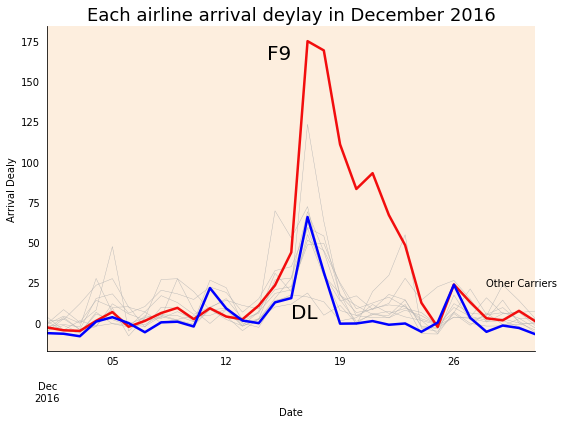

In [219]:
fig, ax = plt.subplots(figsize=(8,6))



carreir_list = list(arrdelays_mean_day_mean.columns)

not_highest = carreir_list
not_highest.remove("F9")
not_highest.remove("DL")

arrdelays_mean_day_mean[not_highest].plot(ax=ax, color=[(0.7, 0.7, 0.7)],lw=0.4, legend=False)
plt.text(0.9,0.2,'Other Carriers', transform=ax.transAxes,size=10)


arrdelays_mean_day_mean["F9"].plot(ax=ax, color=(0.95, 0.05, 0.05),lw=2.5, legend=False)

plt.text(0.45,0.9,'F9', transform=ax.transAxes,size=20)

arrdelays_mean_day_mean["DL"].plot(ax=ax, color= "blue",lw=2.5, legend=False)

plt.text(0.5,0.1,'DL', transform=ax.transAxes,size=20)
ax.tick_params(which="both", left=False,bottom=False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_title("Each airline arrival deylay in December 2016",size=18)
ax.set_ylabel("Arrival Dealy")
ax.set_xlabel("Date")
ax.set_facecolor(background_1)

fig.tight_layout()

In [ ]:
not_highest = carreir_list
not_highest.remove(arr_delay_mean.idxmax())

arrdelays_mean_day_mean[not_highest].plot(ax=ax, color=[(0.7, 0.7, 0.7)], lw=0.4, legend=False)
ax.text(1970, 29, "Other Developed Countries")

arrdelays_mean_day_mean["Japan"].plot(ax=ax, color=(0.95, 0.05, 0.05), lw=2.5, legend=False)
ax.text(2006.5, 38, "Japan")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_title("Japan's Aging Population")
ax.set_ylabel("Age Dependency Ratio")


### Question 5

Create a visualization of the relationship between location (origin
and/or destination) and delays.

In [262]:
#top 10 cities origin, top 10 destination 
#do a map 
air_dec = qeds.load("airline_performance_dec16")[["OriginCityName","ArrDelay"]]
air_dec_1 = air_dec.set_index("OriginCityName")

air_dec_1.head()


,ArrDelay
OriginCityName,
"Minneapolis, MN",20.0
"Minneapolis, MN",20.0
"Minneapolis, MN",-3.0
"Minneapolis, MN",-10.0
"Minneapolis, MN",-8.0


In [301]:
air_dec_3 = qeds.load("airline_performance_dec16")[["DestCityName","ArrDelay"]]
air_dec_4 = air_dec_3.set_index("DestCityName")

air_dec_4.head()

,ArrDelay
DestCityName,
"Chicago, IL",20.0
"Chicago, IL",20.0
"Chicago, IL",-3.0
"Chicago, IL",-10.0
"Chicago, IL",-8.0


In [264]:
#I just look at the airport with more than 9000 counts, it's just a random selection for convenience 
vc= air_dec_1.index.value_counts()>9000
vc = vc[vc]

large_appearence_mean = air_dec_1.loc[air_dec_1.index.isin(vc.index)].groupby(level=0).mean()
large_appearence_mean

,ArrDelay
OriginCityName,
"Atlanta, GA",4.431014
"Boston, MA",8.830741
"Chicago, IL",14.169894
"Dallas/Fort Worth, TX",8.028738
"Denver, CO",10.340625
"Detroit, MI",16.760101
"Houston, TX",5.387847
"Las Vegas, NV",9.096138
"Los Angeles, CA",12.832746


In [302]:
vc1= air_dec_4.index.value_counts()>9000
vc1 = vc1[vc1]

large_appearence_mean_de = air_dec_4.loc[air_dec_4.index.isin(vc1.index)].groupby(level=0).mean()
large_appearence_mean_de

,ArrDelay
DestCityName,
"Atlanta, GA",2.986941
"Boston, MA",3.295759
"Chicago, IL",7.552701
"Dallas/Fort Worth, TX",7.498433
"Denver, CO",11.044870
"Detroit, MI",10.888679
"Houston, TX",5.542416
"Las Vegas, NV",12.729814
"Los Angeles, CA",20.313891


In [291]:
large_appearence_mean.nlargest(10,'ArrDelay')

,ArrDelay
OriginCityName,
"Newark, NJ",18.905346
"Detroit, MI",16.760101
"Chicago, IL",14.169894
"Los Angeles, CA",12.832746
"Minneapolis, MN",12.703147
"Denver, CO",10.340625
"New York, NY",9.330726
"San Francisco, CA",9.131068
"Las Vegas, NV",9.096138


In [303]:
large_appearence_mean_de.nlargest(10,'ArrDelay')

,ArrDelay
DestCityName,
"Los Angeles, CA",20.313891
"San Francisco, CA",17.874253
"Newark, NJ",16.102612
"Minneapolis, MN",12.884302
"Las Vegas, NV",12.729814
"Salt Lake City, UT",11.359117
"Denver, CO",11.044870
"Detroit, MI",10.888679
"Seattle, WA",10.655699


In [306]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
df = pd.DataFrame({
    'City': ['Newark, NJ', 'Detroit, MI', 'Chicago, IL', 'Los Angeles, CA', 'Minneapolis, MN','Denver, CO','New York, NY',
            'San Francisco, CA','Las Vegas, NV','Boston, MA'],
    
    'Latitude': [39.83, 42.33, 41.88,  34.05, 44.98,39.74 ,40.73,37.77,36.11,42.36],
    'Longitude': [-74.87, -83.04, -87.62, -118.24, -93.26,-111.87 ,-73.93,-122.43,-115.17,-71.05 ]
})



df["Coordinates"] = list(zip(df.Longitude, df.Latitude))
df.head()

,City,Latitude,Longitude,Coordinates
0,"Newark, NJ",39.83,-74.87,"(-74.87, 39.83)"
1,"Detroit, MI",42.33,-83.04,"(-83.04, 42.33)"
2,"Chicago, IL",41.88,-87.62,"(-87.62, 41.88)"
3,"Los Angeles, CA",34.05,-118.24,"(-118.24, 34.05)"
4,"Minneapolis, MN",44.98,-93.26,"(-93.26, 44.98)"


In [309]:
df1 = pd.DataFrame({
    
    'City': ['Newark, NJ', 'Detroit, MI',  'Los Angeles, CA', 'Minneapolis, MN','Denver, CO',
            'San Francisco, CA','Las Vegas, NV','Phoenix, AZ' , 'Seattle, WA' ,'Salt Lake City, UT' ],
    
    'Latitude': [39.83, 42.33,   34.05, 44.98,39.74,37.77,36.11,33.44,47.60, 40.75],
    'Longitude': [-74.87, -83.04,  -118.24, -93.26,-104.99,-122.43,-115.17,-112.07,-122.33,-111.87],
})

df1["Coordinates"] = list(zip(df1.Longitude, df1.Latitude))
df1.head()

,City,Latitude,Longitude,Coordinates
0,"Newark, NJ",39.83,-74.87,"(-74.87, 39.83)"
1,"Detroit, MI",42.33,-83.04,"(-83.04, 42.33)"
2,"Los Angeles, CA",34.05,-118.24,"(-118.24, 34.05)"
3,"Minneapolis, MN",44.98,-93.26,"(-93.26, 44.98)"
4,"Denver, CO",39.74,-104.99,"(-104.99, 39.74)"


In [310]:
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,City,Latitude,Longitude,Coordinates
0,"Newark, NJ",39.83,-74.87,POINT (-74.87 39.83)
1,"Detroit, MI",42.33,-83.04,POINT (-83.04000000000001 42.33)
2,"Chicago, IL",41.88,-87.62,POINT (-87.62 41.88)
3,"Los Angeles, CA",34.05,-118.24,POINT (-118.24 34.05)
4,"Minneapolis, MN",44.98,-93.26,POINT (-93.26000000000001 44.98)


In [311]:
df1["Coordinates"] = df1["Coordinates"].apply(Point)
df1.head()

,City,Latitude,Longitude,Coordinates
0,"Newark, NJ",39.83,-74.87,POINT (-74.87 39.83)
1,"Detroit, MI",42.33,-83.04,POINT (-83.04000000000001 42.33)
2,"Los Angeles, CA",34.05,-118.24,POINT (-118.24 34.05)
3,"Minneapolis, MN",44.98,-93.26,POINT (-93.26000000000001 44.98)
4,"Denver, CO",39.74,-104.99,POINT (-104.99 39.74)


In [314]:
usa_airport = gpd.GeoDataFrame(df, geometry="Coordinates")
usa_airport

,City,Latitude,Longitude,Coordinates
0,"Newark, NJ",39.83,-74.87,POINT (-74.87000 39.83000)
1,"Detroit, MI",42.33,-83.04,POINT (-83.04000 42.33000)
2,"Chicago, IL",41.88,-87.62,POINT (-87.62000 41.88000)
3,"Los Angeles, CA",34.05,-118.24,POINT (-118.24000 34.05000)
4,"Minneapolis, MN",44.98,-93.26,POINT (-93.26000 44.98000)
5,"Denver, CO",39.74,-111.87,POINT (-111.87000 39.74000)
6,"New York, NY",40.73,-73.93,POINT (-73.93000 40.73000)
7,"San Francisco, CA",37.77,-122.43,POINT (-122.43000 37.77000)
8,"Las Vegas, NV",36.11,-115.17,POINT (-115.17000 36.11000)
9,"Boston, MA",42.36,-71.05,POINT (-71.05000 42.36000)


In [315]:
usa_airport_de = gpd.GeoDataFrame(df1, geometry="Coordinates")
usa_airport_de

,City,Latitude,Longitude,Coordinates
0,"Newark, NJ",39.83,-74.87,POINT (-74.87000 39.83000)
1,"Detroit, MI",42.33,-83.04,POINT (-83.04000 42.33000)
2,"Los Angeles, CA",34.05,-118.24,POINT (-118.24000 34.05000)
3,"Minneapolis, MN",44.98,-93.26,POINT (-93.26000 44.98000)
4,"Denver, CO",39.74,-104.99,POINT (-104.99000 39.74000)
5,"San Francisco, CA",37.77,-122.43,POINT (-122.43000 37.77000)
6,"Las Vegas, NV",36.11,-115.17,POINT (-115.17000 36.11000)
7,"Phoenix, AZ",33.44,-112.07,POINT (-112.07000 33.44000)
8,"Seattle, WA",47.60,-122.33,POINT (-122.33000 47.60000)
9,"Salt Lake City, UT",40.75,-111.87,POINT (-111.87000 40.75000)


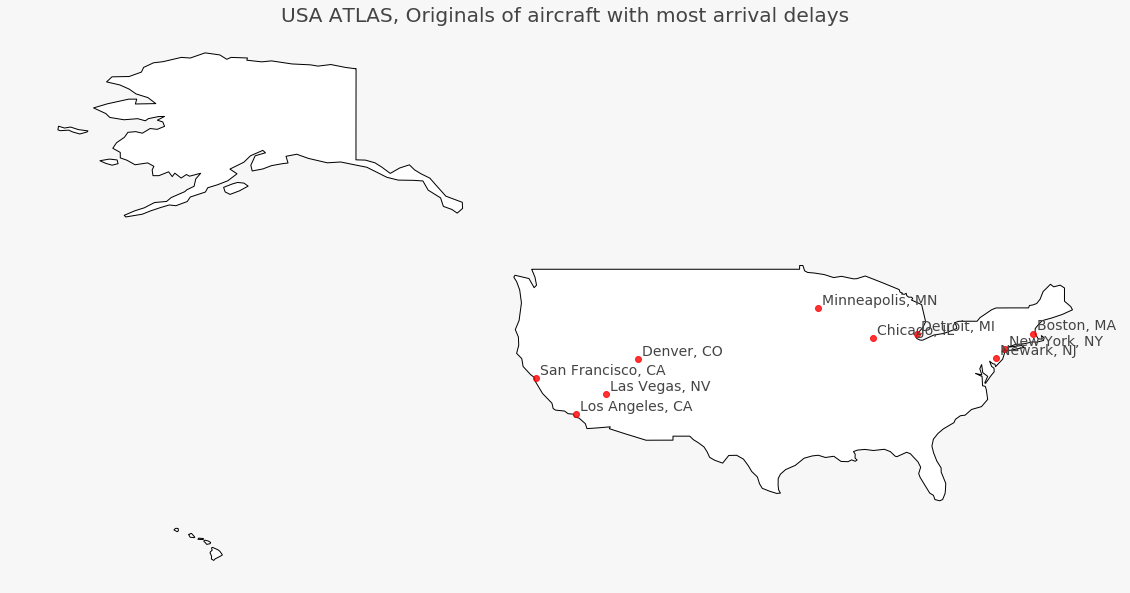

In [318]:
fig, gax = plt.subplots(figsize=(20,20))


world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')


usa_airport.plot(ax=gax, color='red', alpha = 0.8)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('USA ATLAS, Originals of aircraft with most arrival delays')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)


plt.axis('off')


# Label the cities
for x, y, label in zip(usa_airport['Coordinates'].x, usa_airport['Coordinates'].y, usa_airport['City']):
    gax.annotate(label, xy=(x,y), xytext=(4,4), textcoords='offset points')

plt.show()


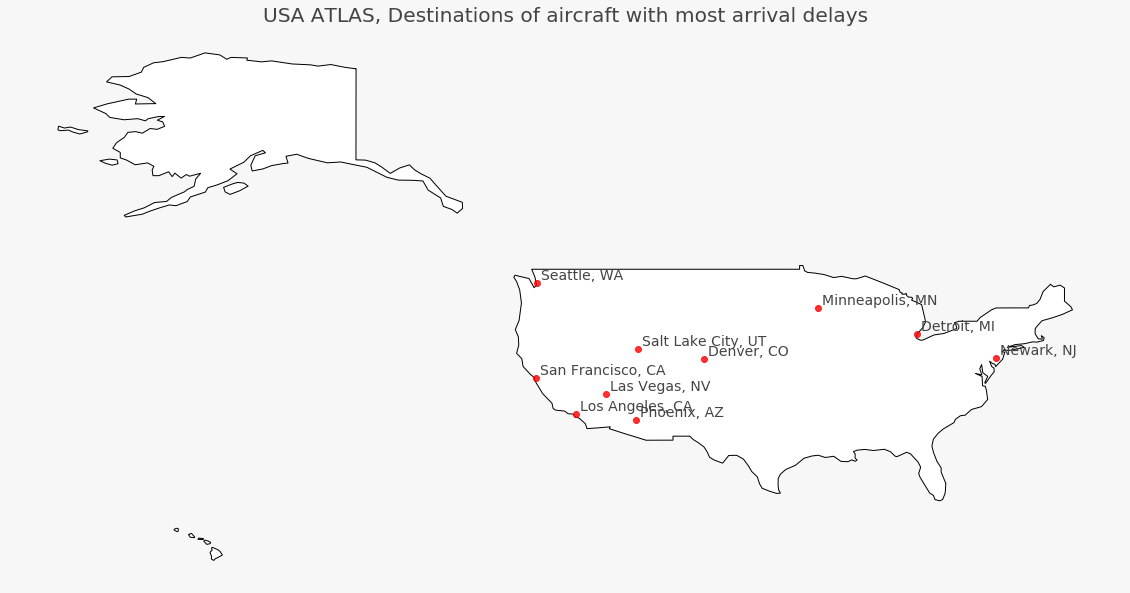

In [319]:
fig, gax = plt.subplots(figsize=(20,20))


world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')


usa_airport_de.plot(ax=gax, color='red', alpha = 0.8)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('USA ATLAS, Destinations of aircraft with most arrival delays')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)


plt.axis('off')


# Label the cities
for x, y, label in zip(usa_airport_de['Coordinates'].x, usa_airport_de['Coordinates'].y, usa_airport_de['City']):
    gax.annotate(label, xy=(x,y), xytext=(4,4), textcoords='offset points')

plt.show()

